# Session 8: Parsing

In this session, we will define a simple CFG and use different kinds of parsers for generating the parse tree of a given example sentence. Finally, we will compare the results of the different parsers.

In [48]:
import nltk
import string
from nltk import word_tokenize, CFG, ChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser
# nltk.download('punkt')

In [49]:
original_sentence = "Lazy cats play with mice."
# [S [NP [JJ] [NNS]] [VP [Vt] [IN] [NNS]]]
# original grammar (example)
"""
grammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small"
  CC  -> "and" | "or"
  ''')
"""

# our extended grammar: basically, we added rules for VP and some terminal symbols
grammar = CFG.fromstring('''
    S -> NP VP | NP
    NP -> NNS | JJ NNS | NP CC NP
    VP -> Vt PP
    PP -> IN NP
    NNS -> 'cats' | 'dogs' | 'mice' | NNS CC NNS
    JJ -> 'big' | 'small' | 'lazy'
    CC -> 'and' | 'or'
    IN -> 'with'
    Vt -> 'play'
    ''')

In [50]:
def remove_punctuation(token):
    res = ''
    for c in token:
        if c not in string.punctuation:
            res += c
    return res

sent = word_tokenize(remove_punctuation(original_sentence.lower()))

In [51]:
parsers = {}
parsers['BottomUpChartParser'] =  BottomUpChartParser(grammar)
parsers['BottomUpLeftCornerChartParser'] = BottomUpLeftCornerChartParser(grammar)
parsers['LeftCornerChartParser'] = LeftCornerChartParser(grammar)

parse = {}
for name, parser in parsers.items():
    for t in parser.parse(sent):
        parse[name] = t


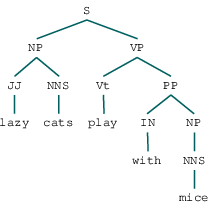

In [54]:
parse['BottomUpChartParser']

In [62]:
parsed = parsers['BottomUpChartParser'].chart_parse(sent)
print("num edges for the BottomUpChartParser:", parsed.num_edges())
parsed.edges()

num edges for the BottomUpChartParser: 52


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:0] JJ -> * 'lazy'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:0] NP -> * JJ NNS],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:1] NNS -> * 'cats'],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:1] NP -> * NNS],
 [Edge: [1:1] NNS -> * NNS CC NNS],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [1:1] S  -> * NP VP],
 [Edge: [1:1] S  -> * NP],
 [Edge: [1:1] NP -> * NP CC NP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP *],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [0:0] S  -> * NP VP],
 [Edge: [0:0] S  -> * NP],
 [Edge: [0:0] NP -> * NP CC NP],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] S  -> NP *],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [2:2] Vt -> * 'play'],
 [Edge: [2:3] Vt -> 'play' *],
 [Edge: [2:2] VP -> * Vt PP],
 [Edge: [2:3] VP -> Vt * PP],
 [Edge: [3:3] IN -> * 'with'],
 [Edge: [3:4] IN -> 'with

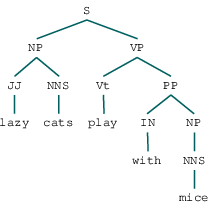

In [56]:
parse['BottomUpLeftCornerChartParser']

In [57]:
parsed = parsers['BottomUpLeftCornerChartParser'].chart_parse(sent)
print("num edges for the BottomUpLeftCornerChartParser:", parsed.num_edges())
parsed.edges()

num edges for the BottomUpLeftCornerChartParser: 31


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] S  -> NP *],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP *],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [2:3] Vt -> 'play' *],
 [Edge: [2:3] VP -> Vt * PP],
 [Edge: [3:4] IN -> 'with' *],
 [Edge: [3:4] PP -> IN * NP],
 [Edge: [4:5] NNS -> 'mice' *],
 [Edge: [4:5] NP -> NNS *],
 [Edge: [4:5] NNS -> NNS * CC NNS],
 [Edge: [4:5] S  -> NP * VP],
 [Edge: [4:5] S  -> NP *],
 [Edge: [4:5] NP -> NP * CC NP],
 [Edge: [3:5] PP -> IN NP *],
 [Edge: [2:5] VP -> Vt PP *],
 [Edge: [0:5] S  -> NP VP *],
 [Edge: [1:5] S  -> NP VP *]]

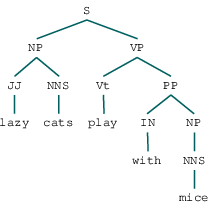

In [58]:
parse['LeftCornerChartParser']

In [59]:
parsed = parsers['LeftCornerChartParser'].chart_parse(sent)
print("num edges for the LeftCornerChartParser:", parsed.num_edges())
parsed.edges()

num edges for the LeftCornerChartParser: 25


[[Edge: [0:1] 'lazy'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'play'],
 [Edge: [3:4] 'with'],
 [Edge: [4:5] 'mice'],
 [Edge: [0:1] JJ -> 'lazy' *],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] S  -> NP * VP],
 [Edge: [0:2] S  -> NP *],
 [Edge: [1:2] S  -> NP * VP],
 [Edge: [1:2] S  -> NP *],
 [Edge: [2:3] Vt -> 'play' *],
 [Edge: [2:3] VP -> Vt * PP],
 [Edge: [3:4] IN -> 'with' *],
 [Edge: [3:4] PP -> IN * NP],
 [Edge: [4:5] NNS -> 'mice' *],
 [Edge: [4:5] NP -> NNS *],
 [Edge: [4:5] S  -> NP *],
 [Edge: [3:5] PP -> IN NP *],
 [Edge: [2:5] VP -> Vt PP *],
 [Edge: [0:5] S  -> NP VP *],
 [Edge: [1:5] S  -> NP VP *]]

## Conclusions

We get the same parse tree from the different trees. The reasons why this is happening is that the used sentence is very simple (so, there are no very different ways of parsing it) and the grammar is not very complicated either. There is no ambiguity.

The relevant difference between the different parsers is the number of generated sentences. All the parsers achieve the same results, but some of them do it in a way more efficient way by generating less edges. For understanding this behaviour, we need to take a look at the internals of the different kinds of parser.

|  Parser                       | Number of edges |
|-------------------------------|-----------------|
| BottomUpChartParser           | 52              |
| BottomUpLeftCornerChartParser | 31              |
| **LeftCornerChartParser**     | **25**          |


We can observe that bottom up strategies lead to repeating derivations. We can take a look at the following rules (taken from the generated edges in the above cells):
- With the Bottom Up strategy we repeat the structure multiple times using the following rule ```NNS -> * NNS CC NNS```
- Using the Bottom Up Left Corner strategy we repeat only the CC NNS structures```NNS -> NNS * CC NNS```
- When we use the Left Corner strategy we do not repeat any rules in this example by defining only the following rule ```NNS -> 'cats' *``` 

The Left Corner parser is way more efficient, at least for this grammar and sentence. Looking at the order it follows for parsing the sentence and the generated edges, it clearly avoids repetitions.